In [1]:
# Author: Ran Sun
# Date: 03/27/2021

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from datetime import datetime

In [3]:
# I80:0500-0515
Traj  = pd.read_csv("data/trajectories-0500-0515.csv")

In [4]:
Traj.head()

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_Length,v_Width,v_Class,v_Vel,v_Acc,Lane_ID,Preceding,Following,Space_Headway,Time_Headway
0,284,63,526,1113436773200,41.375,66.469,6042864.125,2133138.844,15.4,5.9,2,44.55,0.00,4,0,0,0.0,0.0
1,284,64,526,1113436773300,41.375,71.069,6042863.571,2133143.309,15.4,5.9,2,44.55,0.00,4,0,0,0.0,0.0
2,284,65,526,1113436773400,41.374,75.570,6042863.016,2133147.775,15.4,5.9,2,44.55,0.00,4,0,0,0.0,0.0
3,284,66,526,1113436773500,41.373,80.070,6042862.462,2133152.241,15.4,5.9,2,44.55,0.00,4,0,0,0.0,0.0
4,284,67,526,1113436773600,41.372,84.607,6042861.904,2133156.736,15.4,5.9,2,44.55,-6.14,4,0,0,0.0,0.0


In [5]:
Traj.shape

(1048575, 18)

In [6]:
TrajMain = Traj[(Traj["Lane_ID"]>=1)& (Traj["Lane_ID"]<=6) & (Traj["v_Class"]==2)] # select lane = 1-6, v class = auto

TrajMain.shape

(967809, 18)

In [7]:
# of vechiels 
n = TrajMain["Vehicle_ID"].nunique()
n

1345

In [8]:
# describe traj
TrajMain.describe()

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_Length,v_Width,v_Class,v_Vel,v_Acc,Lane_ID,Preceding,Following,Space_Headway,Time_Headway
count,967809.000000,967809.000000,967809.000000,9.678090e+05,967809.000000,967809.000000,9.678090e+05,9.678090e+05,967809.000000,967809.000000,967809.0,967809.000000,967809.000000,967809.000000,967809.000000,967809.000000,967809.000000,967809.000000
mean,1267.736114,3806.673451,868.807983,1.113437e+12,38.224068,889.382626,6.042752e+06,2.133955e+06,15.306961,6.542213,2.0,21.133385,0.000378,3.686302,1218.535052,1241.066485,56.437200,240.932937
std,480.353780,1938.920241,333.288622,1.938920e+05,19.900958,452.266866,6.677197e+01,4.483146e+02,1.630811,0.724996,0.0,12.569572,4.682350,1.602012,542.894566,539.305043,35.535075,1520.620357
min,284.000000,6.000000,218.000000,1.113437e+12,0.000000,0.000000,6.042592e+06,2.133048e+06,7.400000,4.400000,2.0,0.000000,-11.200000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,897.000000,2173.000000,667.000000,1.113437e+12,18.577000,508.243000,6.042696e+06,2.133577e+06,14.300000,5.900000,2.0,12.450000,-0.740000,2.000000,834.000000,857.000000,35.430000,2.000000
50%,1287.000000,3841.000000,837.000000,1.113437e+12,41.049000,898.952000,6.042756e+06,2.133965e+06,15.300000,6.400000,2.0,19.940000,0.000000,4.000000,1259.000000,1277.000000,49.020000,2.760000
75%,1658.000000,5416.000000,987.000000,1.113437e+12,54.268000,1286.161000,6.042808e+06,2.134348e+06,16.300000,6.900000,2.0,27.860000,0.730000,5.000000,1642.000000,1660.000000,69.320000,3.970000
max,2077.000000,8085.000000,1935.000000,1.113438e+12,83.346000,1790.771000,6.042895e+06,2.134845e+06,22.300000,8.500000,2.0,95.300000,11.200000,6.000000,2871.000000,2872.000000,619.300000,9999.990000


In [9]:
max(Traj.Local_X)-min(Traj.Local_X),max(Traj.Local_Y)-min(Traj.Local_Y)

(92.7, 1790.771)

In [10]:
time_end = max(Traj.Global_Time) 
time_start = min(Traj.Global_Time)

In [11]:
# v_Vel - instantaneous velocity in feet/second, 1 feet/second = 0.681818 miles/hour
vmax = max(TrajMain.v_Vel)

vmax,vmax*0.68

(95.3, 64.804)

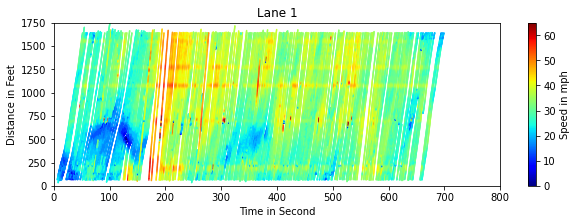

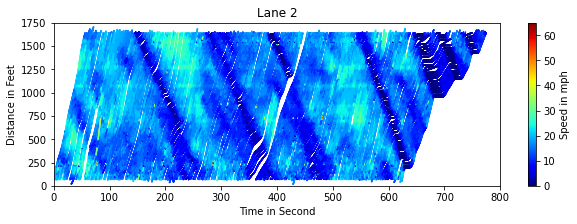

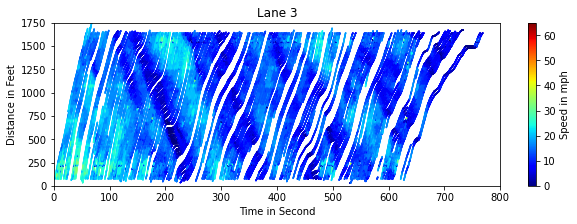

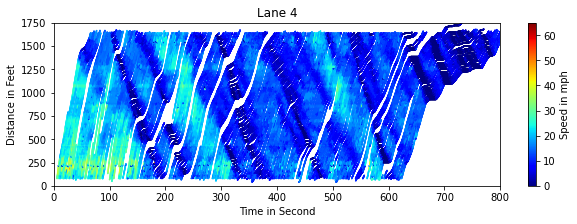

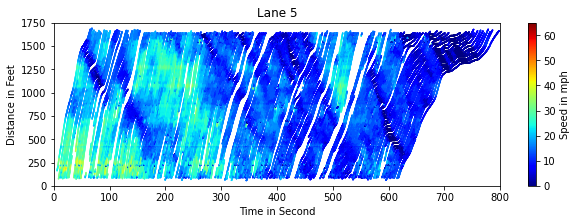

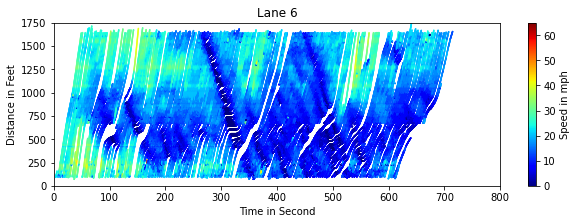

In [12]:
for j in np.arange(1,7):
    laneid = j
    TrajLane = TrajMain[(TrajMain["Lane_ID"]==laneid)]
    vehID = TrajLane.drop_duplicates(["Vehicle_ID"]).sort_values(by = "Global_Time").reset_index(drop = True)

    # trajectory plot
    # x is time in seconds 
    # y is distance in feet
    # color is speed (mile/h)

    # time is 0.1 second

    plt.figure(figsize = (10,3))
    plt.xlim(0,800)
    plt.ylim(0,1750)
    ymax = 0
    i = 0
    while i < (len(vehID)-1):
        
        #select vehicle id
        veh = TrajLane[TrajLane.Vehicle_ID == vehID.iloc[i,0]]

        # x is time in seconds 
        x = (veh['Global_Time']-time_start)/1000

        # y is distance in feet
        y = (np.sqrt(np.square(veh['Local_Y']) + np.square(veh['Local_X']) ))
        if max(y)>ymax:
            ymax = max(y)
    
        # v is speed in miles/h
        v = veh['v_Vel']* 0.681818
        norm = matplotlib.colors.Normalize(vmin=0, vmax=65)
        ax = plt.scatter(x,y, marker = '.', s=1, c=v, cmap='jet', norm = norm)

        i = i + 1


    plt.xlabel('Time in Second')
    plt.ylabel('Distance in Feet')
    plt.title("Lane "+str(j))
    plt.clim(0,65)
    cbar = plt.colorbar()
    cbar.set_label('Speed in mph', rotation=90)
    plt.show()